## Mounting Google drive if dataset is uploaded on Gdrive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing important Labraries

In [2]:
!pip install pyreadstat

In [3]:
import pyreadstat
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

## Reading Dataset

In [4]:
dtafile = 'USCompanies_data_winsorized.dta'
df, meta = pyreadstat.read_dta(dtafile)

## Dataset First five Rows and ClassNames

In [5]:
df.head()

,conm,pe_w,aco_w,ap_w,aqc_w,at_w,bkvlps_w,caps_w,capx_w,ceq_w,...,sale_w,siv_w,teq_w,tstk_w,txt_w,roa_w,roe_w,profit_margin_w,asset_turnover_w,operating_margin_w
0,AAR CORP,41.254368,47.200,127.200,0.000,1539.700,27.5449,479.800,11.300,974.400,...,1651.400,0.000,974.400,274.100,18.200,0.042541,0.067221,0.021679,1.072547,0.173671
1,AMERICAN AIRLINES GROUP INC,-1.103066,418.000,1196.000,0.000,30775.000,-0.6857,5897.168,623.000,-19.750,...,11847.000,41.000,-14.100,0.000,-37.780,-0.183638,0.837353,-0.512488,0.279593,-0.285690
2,CECO ENVIRONMENTAL CORP,29.978601,19.787,55.899,5.895,419.314,5.7301,255.296,3.945,202.658,...,316.011,0.000,203.611,0.356,3.672,0.049111,0.101139,0.025983,0.753638,0.339988
3,ASA GOLD AND PRECIOUS METALS,2.152306,0.131,0.118,0.000,464.740,24.0506,1.372,NaN,463.936,...,1.333,NaN,463.936,0.000,0.000,-0.005683,-0.005693,0.334031,0.002868,-1.981245
4,PINNACLE WEST CAPITAL CORP,16.364105,378.063,318.585,0.000,20020.421,48.9926,0.000,623.000,5633.503,...,3586.982,819.518,5752.793,6.289,78.173,0.039367,0.137003,0.153488,0.179166,0.391006


## Mathematical Descrption of Dataset

In [6]:
df.describe()

,pe_w,aco_w,ap_w,aqc_w,at_w,bkvlps_w,caps_w,capx_w,ceq_w,ch_w,...,sale_w,siv_w,teq_w,tstk_w,txt_w,roa_w,roe_w,profit_margin_w,asset_turnover_w,operating_margin_w
count,4956.000000,4538.000000,4932.000000,4956.000000,4956.000000,4929.000000,4824.000000,4923.000000,4946.000000,4887.000000,...,4956.000000,4770.000000,4956.000000,4945.000000,4954.000000,4946.000000,4955.000000,4481.000000,4946.000000,4481.000000
mean,1.204519,51.973920,382.626984,17.971731,4053.070918,11.937821,891.671623,73.231801,1078.143456,282.595903,...,1594.907305,87.836877,1158.629251,119.791047,19.664689,-0.096621,-0.019546,-0.835486,0.504654,0.205263
std,101.727788,105.420945,878.071812,52.703772,7718.564421,13.815800,1499.401239,158.240095,1981.117670,494.138085,...,3062.487634,238.814828,2143.875376,343.578764,53.938529,0.283625,0.459106,2.433348,0.500056,0.899749
min,-535.730652,0.000000,0.118000,0.000000,4.124000,-0.685700,0.000000,0.000000,-19.750000,0.222000,...,0.000000,0.000000,-14.100000,0.000000,-37.780000,-0.984706,-1.246837,-9.885000,0.000000,-3.192247
25%,-9.971765,0.691250,2.333000,0.000000,103.405500,1.255900,51.013500,0.202000,31.319250,10.605000,...,18.251250,0.000000,33.773000,0.000000,0.000000,-0.127678,-0.160335,-0.279503,0.067482,0.201093
50%,-0.495677,6.409500,20.009000,0.000000,747.327000,6.771700,261.554000,4.932000,225.456000,61.781000,...,224.574000,0.000000,238.618500,0.000000,0.101500,0.014193,0.072488,0.010993,0.358562,0.389049
75%,19.491211,40.163500,183.342250,0.000000,3395.961000,17.770500,897.796750,48.305500,981.696750,271.391000,...,1372.151000,9.670750,1051.128500,6.000000,11.397750,0.059920,0.194190,0.116123,0.780880,0.656997
max,493.864349,418.000000,3532.000000,217.029000,30775.000000,48.992600,5897.168000,623.000000,7840.000000,1873.300000,...,11847.000000,969.399000,8475.900000,1400.000000,203.833000,0.165736,0.837353,0.334031,1.740436,0.883584


## Deep Dataset Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   conm                4956 non-null   object 
 1   pe_w                4956 non-null   float64
 2   aco_w               4538 non-null   float64
 3   ap_w                4932 non-null   float64
 4   aqc_w               4956 non-null   float64
 5   at_w                4956 non-null   float64
 6   bkvlps_w            4929 non-null   float64
 7   caps_w              4824 non-null   float64
 8   capx_w              4923 non-null   float64
 9   ceq_w               4946 non-null   float64
 10  ch_w                4887 non-null   float64
 11  chech_w             4934 non-null   float64
 12  ci_w                4942 non-null   float64
 13  cidergl_w           4925 non-null   float64
 14  cogs_w              4956 non-null   float64
 15  dlc_w               4954 non-null   float64
 16  dp_w  

## check missing values in variables

In [8]:
df.isnull().sum()

conm                    0
pe_w                    0
aco_w                 418
ap_w                   24
aqc_w                   0
at_w                    0
bkvlps_w               27
caps_w                132
capx_w                 33
ceq_w                  10
ch_w                   69
chech_w                22
ci_w                   14
cidergl_w              31
cogs_w                  0
dlc_w                   2
dp_w                  184
dvt_w                  23
ebitda_w              152
epspi_w                 3
fiao_w                 23
fopo_w                 23
gdwl_w                 35
ib_w                    0
icapt_w                 0
intano_w               99
invt_w                 58
ivncf_w                23
ivst_w                 76
lco_w                 418
lt_w                   13
np_w                    5
oancf_w                22
ppent_w               124
re_w                  108
rect_w                 47
sale_w                  0
siv_w                 186
teq_w       

## Applying interpolation for filling missing values

In [9]:
df['aco_w']= df['aco_w'].interpolate(method='nearest')
df['ap_w']= df['ap_w'].interpolate(method='nearest')
df['bkvlps_w']= df['bkvlps_w'].interpolate(method='nearest')
df['caps_w']= df['caps_w'].interpolate(method='nearest')
df['capx_w']= df['capx_w'].interpolate(method='nearest')
df['ceq_w']= df['ceq_w'].interpolate(method='nearest')
df['ch_w']= df['ch_w'].interpolate(method='nearest')
df['chech_w']= df['chech_w'].interpolate(method='nearest')
df['ci_w']= df['ci_w'].interpolate(method='nearest')
df['cidergl_w']= df['cidergl_w'].interpolate(method='nearest')
df['dlc_w']= df['dlc_w'].interpolate(method='nearest')
df['dp_w']= df['dp_w'].interpolate(method='nearest')
df['dvt_w']= df['dvt_w'].interpolate(method='nearest')
df['ebitda_w']= df['ebitda_w'].interpolate(method='nearest')
df['epspi_w']= df['epspi_w'].interpolate(method='nearest')
df['fiao_w']= df['fiao_w'].interpolate(method='nearest')                       
df['fopo_w']= df['fopo_w'].interpolate(method='nearest')
df['gdwl_w']= df['gdwl_w'].interpolate(method='nearest')
df['intano_w']= df['intano_w'].interpolate(method='nearest')
df['invt_w']= df['invt_w'].interpolate(method='nearest')
df['ivncf_w']= df['ivncf_w'].interpolate(method='nearest')
df['ivst_w']= df['ivst_w'].interpolate(method='nearest')
df['lco_w']= df['lco_w'].interpolate(method='nearest')
df['lt_w']= df['lt_w'].interpolate(method='nearest')
df['np_w']= df['np_w'].interpolate(method='nearest')
df['oancf_w']= df['oancf_w'].interpolate(method='nearest')
df['ppent_w']= df['ppent_w'].interpolate(method='nearest')
df['re_w']= df['re_w'].interpolate(method='nearest')
df['rect_w']= df['rect_w'].interpolate(method='nearest')
df['siv_w']= df['siv_w'].interpolate(method='nearest')
df['tstk_w']= df['tstk_w'].interpolate(method='nearest')
df['txt_w']= df['txt_w'].interpolate(method='nearest')
df['roa_w']= df['roa_w'].interpolate(method='nearest')
df['roe_w']= df['roe_w'].interpolate(method='nearest')
df['profit_margin_w']= df['profit_margin_w'].interpolate(method='nearest')
df['asset_turnover_w']= df['asset_turnover_w'].interpolate(method='nearest')
df['operating_margin_w']= df['operating_margin_w'].interpolate(method='nearest')

## checking again missing values in variables

In [10]:
df.isnull().sum()

conm                  0
pe_w                  0
aco_w                 0
ap_w                  0
aqc_w                 0
at_w                  0
bkvlps_w              0
caps_w                0
capx_w                0
ceq_w                 0
ch_w                  0
chech_w               0
ci_w                  0
cidergl_w             0
cogs_w                0
dlc_w                 0
dp_w                  0
dvt_w                 0
ebitda_w              0
epspi_w               0
fiao_w                0
fopo_w                0
gdwl_w                0
ib_w                  0
icapt_w               0
intano_w              0
invt_w                0
ivncf_w               0
ivst_w                0
lco_w                 0
lt_w                  0
np_w                  0
oancf_w               0
ppent_w               0
re_w                  0
rect_w                0
sale_w                0
siv_w                 0
teq_w                 0
tstk_w                0
txt_w                 0
roa_w           

## Fiting Return on Assets (roa_w) as the response and the other variables as predictors.

In [11]:
X = df.drop(['conm','roa_w'], axis=1)
y = df['roa_w']

## Spliting Dataset into train and test according to given sceniro training set containing half of the observations, and a test set containing the remaining observations

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)

## check the shape of X_train and X_test

In [13]:
X_train.shape, X_test.shape

((2478, 44), (2478, 44))

## Fiting DecisionTreeRegressor

In [14]:
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
err = mean_squared_error(y_test, pred) ** .5
mae_reg=mean_absolute_error(y_test, pred)
print('*'*50)
print(f'RMSE of {reg} model is: {err}')
print(f'MAE value of {reg} is: {np.mean(mean_absolute_error(y_test, pred))}')
print('*'*50)

**************************************************
RMSE of DecisionTreeRegressor() model is: 0.10780551954157981
MAE value of DecisionTreeRegressor() is: 0.043671773525242055
**************************************************


## Implementing Bagged Tree

In [15]:
bagg = BaggingRegressor()
bagg.fit(X_train,y_train)
pred = bagg.predict(X_test)
err = mean_squared_error(y_test, pred) ** .5
mae_bagg=mean_absolute_error(y_test, pred)
print('*'*50)
print(f'RMSE of {bagg} model is: {err}')
print(f'MAE value of {bagg} is: {np.mean(mean_absolute_error(y_test, pred))}')
print('*'*50)

**************************************************
RMSE of BaggingRegressor() model is: 0.08226655712710888
MAE value of BaggingRegressor() is: 0.037915900829841954
**************************************************


## Comapring MAE of DecisionTree with Bagged Tree

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 <a list of 6 Text major ticklabel objects>)

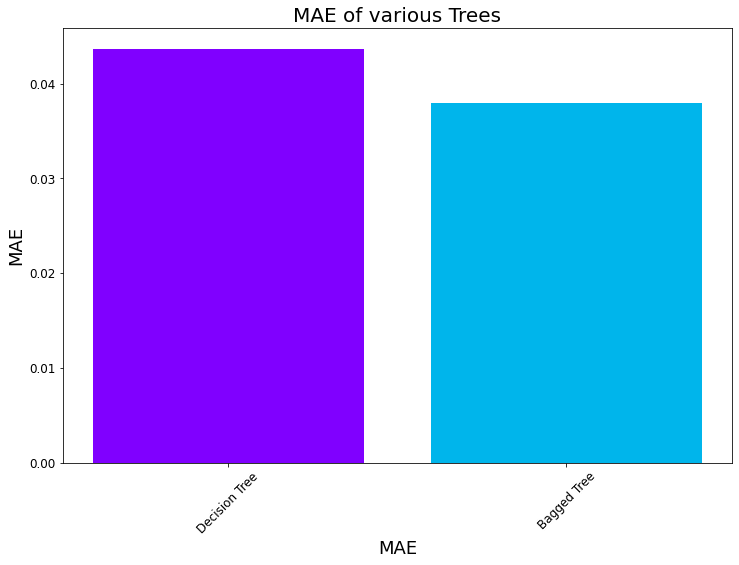

In [16]:
mae_score = np.zeros(4)
mae_score [0] = mae_reg
mae_score [1] = mae_bagg
#ploting Comparision
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Decision Tree', 'Bagged Tree']
plt.bar(labels,
 mae_score[:2],
 color = colors)
plt.xlabel('MAE',fontsize=18)
plt.ylabel('MAE',fontsize=18)
plt.title('MAE of various Trees',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

##  MAE express average model prediction error in units of the variable of interest. Both metrics can range from 0 to ∞ and are indifferent to the direction of errors. They are negatively-oriented scores, which means lower values are better. So, In above case Bagged Tree is better.

## Applying random forests

In [17]:
ram = RandomForestRegressor()
ram.fit(X_train,y_train)
pred = ram.predict(X_test)
err = mean_squared_error(y_test, pred) ** .5
mae_ram=mean_absolute_error(y_test, pred)
mae_score [2] = mae_ram
print('*'*50)
print(f'RMSE of {ram} model is: {err}')
print(f'MAE value of {ram} is: {np.mean(mean_absolute_error(y_test, pred))}')
print('*'*50)

**************************************************
RMSE of RandomForestRegressor() model is: 0.07914474098512707
MAE value of RandomForestRegressor() is: 0.03589077227274636
**************************************************


(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ]),
 <a list of 9 Text major ticklabel objects>)

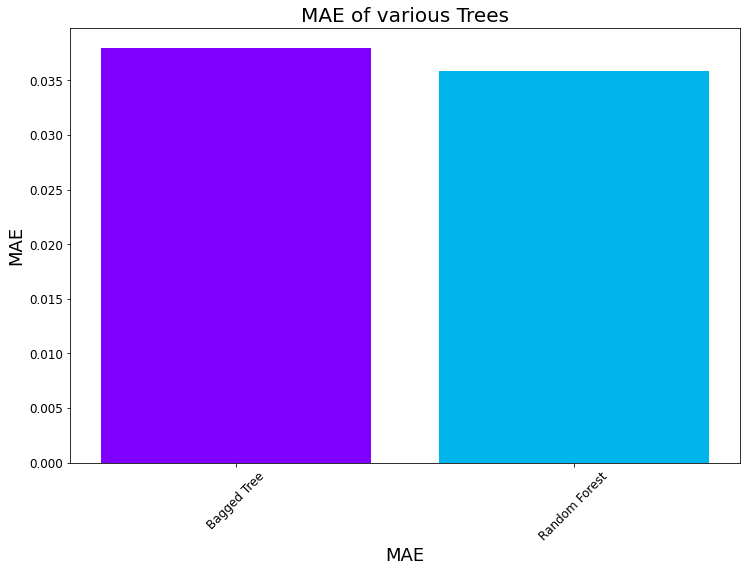

In [18]:
#ploting Comparision
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Bagged Tree','Random Forest']
plt.bar(labels,
 mae_score[1:3],
 color = colors)
plt.xlabel('MAE',fontsize=18)
plt.ylabel('MAE',fontsize=18)
plt.title('MAE of various Trees',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

### From above graph its diffcult to figure out the improvement of Random Forest over Bagged Tree so for that purpose we are printing their MAE values 

In [19]:
print("MAE value of Bagged Tree", mae_bagg)
print("MAE value of Random Forest", mae_ram)

MAE value of Bagged Tree 0.037915900829841954
MAE value of Random Forest 0.03589077227274636


### From above values we can conculd that Random Forest shows little bit improvement in MAE over Bagged Tree

##  Applying boosting 

In [20]:
xgb = GradientBoostingRegressor()
xgb.fit(X_train,y_train)
pred = xgb.predict(X_test)
err = mean_squared_error(y_test, pred) ** .5
mae_xgb=mean_absolute_error(y_test, pred)
mae_score [3] = mae_xgb
print('*'*50)
print(f'RMSE of {xgb} model is: {err}')
print(f'MAE value of {xgb} is: {np.mean(mean_absolute_error(y_test, pred))}')
print('*'*50)

**************************************************
RMSE of GradientBoostingRegressor() model is: 0.0832590179090765
MAE value of GradientBoostingRegressor() is: 0.044711847409840424
**************************************************


## the most important predictors in the boosted model

In [24]:
print(xgb.feature_importances_)

[1.97671835e-03 1.67362965e-04 8.89693980e-04 0.00000000e+00
 1.34538727e-01 5.28084880e-03 3.15211042e-04 9.00071399e-05
 7.50122850e-03 1.14640238e-03 2.27315000e-05 1.62065970e-04
 0.00000000e+00 1.20416112e-03 1.18941617e-03 1.06299557e-03
 6.14220875e-05 4.53478806e-01 2.70157353e-04 3.42146393e-04
 1.26188517e-04 7.94832243e-04 3.76075998e-03 5.88882565e-02
 1.49711062e-03 2.25234805e-04 4.22263191e-04 2.25147869e-03
 7.11792269e-04 2.73936503e-03 4.96401587e-04 1.01421975e-03
 3.56545633e-04 1.07341713e-04 9.55515504e-05 4.04128424e-02
 0.00000000e+00 1.94562380e-02 6.81566257e-05 1.14855256e-03
 1.31860617e-01 7.96666853e-02 4.30964478e-02 1.10301596e-03]


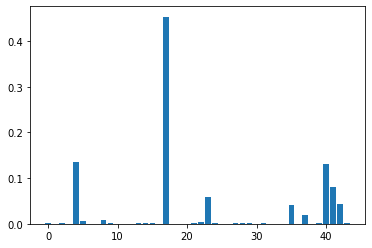

In [26]:
# plot
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
plt.show()

## the most important predictors in the boosted model is on 18 as shown in above graph and in dataset on number 18 is **ebitda_w**            

## Overall Comparsion of All Trees

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 <a list of 6 Text major ticklabel objects>)

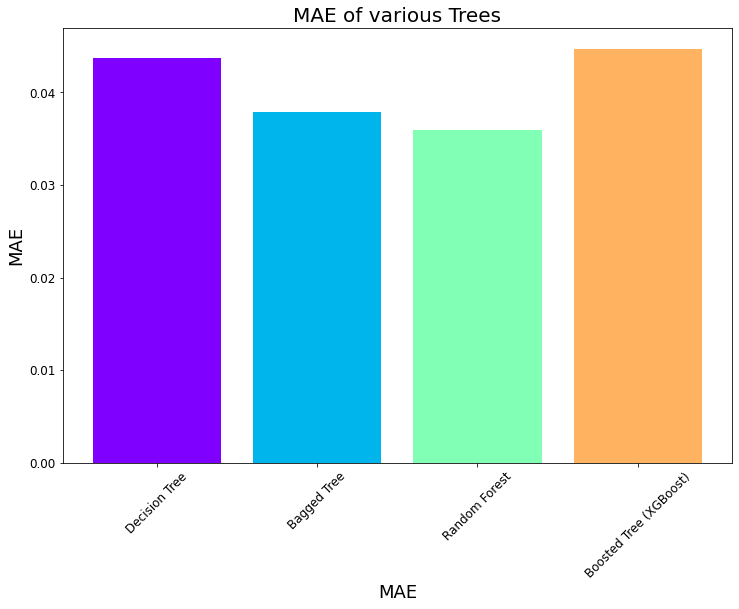

In [22]:
#ploting Comparision
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Decision Tree','Bagged Tree','Random Forest','Boosted Tree (XGBoost)']
plt.bar(labels,
 mae_score[0:5],
 color = colors)
plt.xlabel('MAE',fontsize=18)
plt.ylabel('MAE',fontsize=18)
plt.title('MAE of various Trees',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

### From above graph we can make conculsion that Random Forest outperforms all others models in comparision of MAE.